## Importing Libraries

In [4]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split



## Reading Data

In [2]:
data_folder = r"C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train"


--- Training Set Class Distribution ---
Angry     : 4102 images
Disgust   : 613 images
Fear      : 4172 images
Happy     : 7421 images
Neutral   : 5019 images
Sad       : 4921 images
Surprise  : 3417 images


--- Testing Set Class Distribution ---
Angry     : 958 images
Disgust   : 111 images
Fear      : 1024 images
Happy     : 1774 images
Neutral   : 1233 images
Sad       : 1247 images
Surprise  : 831 images


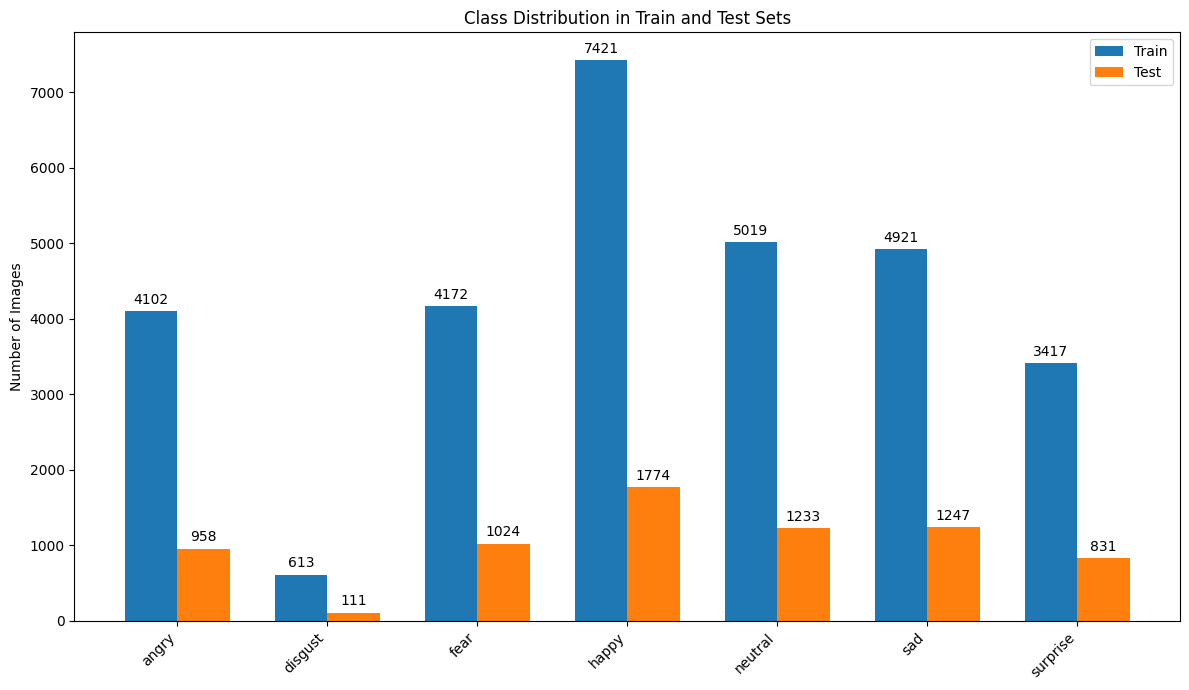

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Set the Path to Your Data ---
# !!! IMPORTANT: CHANGE THIS to the path where your 'train' and 'test' folders are.
base_data_path = r"C:\Users\moham\OneDrive\Desktop\Project-1\Data" # <--- CHANGE THIS

train_path = os.path.join(base_data_path, 'train')
test_path = os.path.join(base_data_path, 'test')

def count_images_in_classes(directory_path):
    """Counts the number of files in each immediate sub-directory."""
    class_counts = {}
    if not os.path.isdir(directory_path):
        print(f"Error: Directory not found at {directory_path}")
        return None
        
    for class_name in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            class_counts[class_name] = num_files
    return class_counts

# --- 2. Get the Counts for Each Set ---
train_counts = count_images_in_classes(train_path)
test_counts = count_images_in_classes(test_path)

# --- 3. Print the Results ---
if train_counts:
    print("--- Training Set Class Distribution ---")
    for class_name, count in sorted(train_counts.items()):
        print(f"{class_name.capitalize():<10}: {count} images")

print("\n" + "="*40 + "\n")

if test_counts:
    print("--- Testing Set Class Distribution ---")
    for class_name, count in sorted(test_counts.items()):
        print(f"{class_name.capitalize():<10}: {count} images")

# --- 4. Visualize the Distributions ---
if train_counts and test_counts:
    labels = sorted(train_counts.keys())
    train_values = [train_counts[label] for label in labels]
    test_values = [test_counts[label] for label in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(x - width/2, train_values, width, label='Train')
    rects2 = ax.bar(x + width/2, test_values, width, label='Test')

    # Add some text for labels, title and axes ticks
    ax.set_ylabel('Number of Images')
    ax.set_title('Class Distribution in Train and Test Sets')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()
    plt.show()

--- Class Distribution in train ---
Angry     : 13877 images
Disgust   : 12265 images
Fear      : 13654 images
Happy     : 16393 images
Neutral   : 15030 images
Sad       : 14959 images
Surprise  : 13169 images


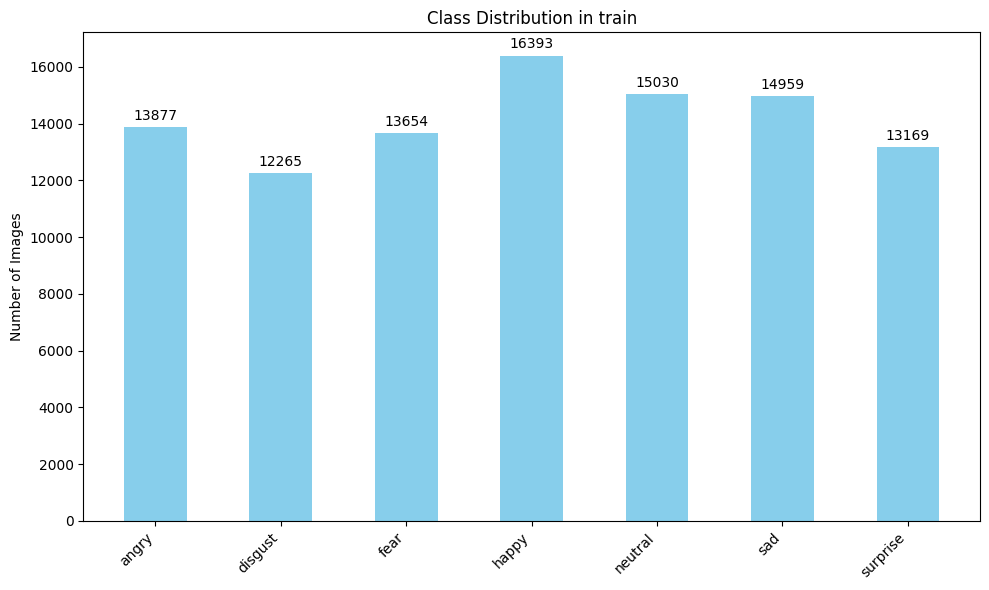

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

# --- Set the Path to Your Folder ---
# Change this to the folder you want to analyze
data_path = r"C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train"

def count_images_in_classes(directory_path):
    """Counts the number of files in each immediate sub-directory."""
    class_counts = {}
    if not os.path.isdir(directory_path):
        print(f"Error: Directory not found at {directory_path}")
        return None
        
    for class_name in os.listdir(directory_path):
        class_path = os.path.join(directory_path, class_name)
        if os.path.isdir(class_path):
            num_files = len(os.listdir(class_path))
            class_counts[class_name] = num_files
    return class_counts

# --- Get Counts ---
counts = count_images_in_classes(data_path)

# --- Print Results ---
if counts:
    print(f"--- Class Distribution in {os.path.basename(data_path)} ---")
    for class_name, count in sorted(counts.items()):
        print(f"{class_name.capitalize():<10}: {count} images")

# --- Visualize ---
if counts:
    labels = sorted(counts.keys())
    values = [counts[label] for label in labels]

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects = ax.bar(x, values, width, color='skyblue')

    # Add some text for labels, title and axes ticks
    ax.set_ylabel('Number of Images')
    ax.set_title(f'Class Distribution in {os.path.basename(data_path)}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")

    ax.bar_label(rects, padding=3)

    fig.tight_layout()
    plt.show()


In [5]:

# Initialize lists
X, y = [], []

# Use folder names as labels
emotion_labels = os.listdir(data_folder)

for label_index, label_name in enumerate(emotion_labels):
    folder_path = os.path.join(data_folder, label_name)
    if not os.path.isdir(folder_path):
        continue

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Skip if image failed to load
            if img is None:
                print(f"⚠️ Warning: could not read image {img_path}")
                continue

            img = cv2.resize(img, (48, 48))
            img = img.astype('float32') / 255.0
            X.append(img)
            y.append(label_index)

# Convert to numpy arrays
X = np.array(X)
X = np.expand_dims(X, -1)   # Add channel dimension
y = np.array(y)

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=len(emotion_labels))
y_val = to_categorical(y_val, num_classes=len(emotion_labels))

print("✅ Data loaded successfully!")
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

warning_count = 0

if warning_count > 0:
    print(f"\n⚠️ Total warnings: {warning_count} images could not be read.")
else:
    print("\n✅ No unreadable images found.")


⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109313.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109394.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109443.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109444.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109465.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109470.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109477.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive\Desktop\Project-1\Data_augmented\train\fear\img_16109478.jpg
⚠️ Warning: could not read image C:\Users\moham\OneDrive

## Architecture & Training Settings

In [12]:

model = Sequential([
    # Block 1
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1), padding='same'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    # Block 2
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),

    # Block 3
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    # Block 4
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),


    # Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 classes
])


model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Callbacks

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ModelCheckpoint('best_emotion_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
]



In [14]:
from sklearn.utils import class_weight
import numpy as np


y_train_integers = np.argmax(y_train, axis=1)

# Calculate the class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_integers),
    y=y_train_integers
)

# Keras expects a dictionary mapping class indices to their weights
class_weight_dict = dict(enumerate(class_weights))

print("Class Weight Dictionary:\n", class_weight_dict)

Class Weight Dictionary:
 {0: 1.0061539869370761, 1: 1.138417932855331, 2: 1.0289761826774602, 3: 0.8675082597761231, 4: 0.9289463401239848, 5: 1.0076062178539926, 6: 1.070436761466662}


## Training

In [15]:
import math

steps_per_epoch = math.ceil(len(X_train) / 64)

history = model.fit(
    X_train, 
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    batch_size=64,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)


Epoch 1/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2668 - loss: 2.2211
Epoch 1: val_accuracy improved from None to 0.49529, saving model to best_emotion_model.keras
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 1637s 1s/step - accuracy: 0.3480 - loss: 1.8497 - val_accuracy: 0.4953 - val_loss: 1.3650 - learning_rate: 5.0000e-04
Epoch 2/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5094 - loss: 1.3064
Epoch 2: val_accuracy improved from 0.49529 to 0.54481, saving model to best_emotion_model.keras
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3384s 2s/step - accuracy: 0.5300 - loss: 1.2460 - val_accuracy: 0.5448 - val_loss: 1.1977 - learning_rate: 5.0000e-04
Epoch 3/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5890 - loss: 1.0911
Epoch 3: val_accuracy improved from 0.54481 to 0.62042, saving model to best_emotion_model.keras
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3211s 2s/step - accuracy: 0.5977 - loss: 1.0707 - val_accuracy: 0.6204 - val_loss: 1.0079 - learning_rate: 5.0000e-04
Epoc

## Evaluate

306/306 ━━━━━━━━━━━━━━━━━━━━ 77s 249ms/step
📊 Confusion Matrix:
 [[1056   24   84   29   82   98   15]
 [   8 1188    5    6    5   10    5]
 [  79    9  977   17   68  142   65]
 [  12    3   18 1491   59    9   17]
 [  47    4   44   63 1216  119   10]
 [  82    9  122   25  142  994   12]
 [  26    2   42   19   12   11 1192]]

📋 Classification Report:
               precision    recall  f1-score   support

       angry       0.81      0.76      0.78      1388
     disgust       0.96      0.97      0.96      1227
        fear       0.76      0.72      0.74      1357
       happy       0.90      0.93      0.92      1609
     neutral       0.77      0.81      0.79      1503
         sad       0.72      0.72      0.72      1386
    surprise       0.91      0.91      0.91      1304

    accuracy                           0.83      9774
   macro avg       0.83      0.83      0.83      9774
weighted avg       0.83      0.83      0.83      9774


✅ Model Accuracy: 83.02%


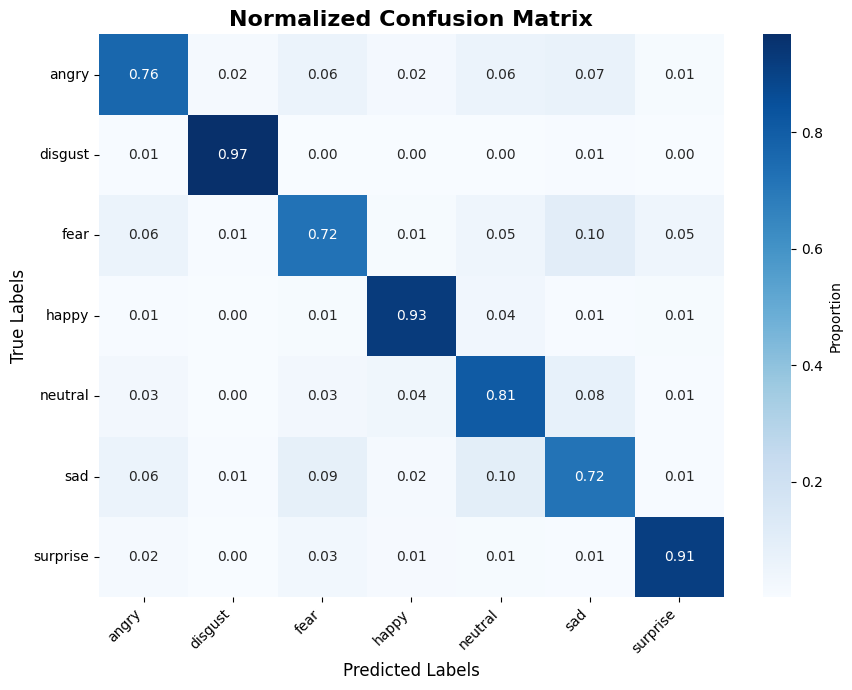

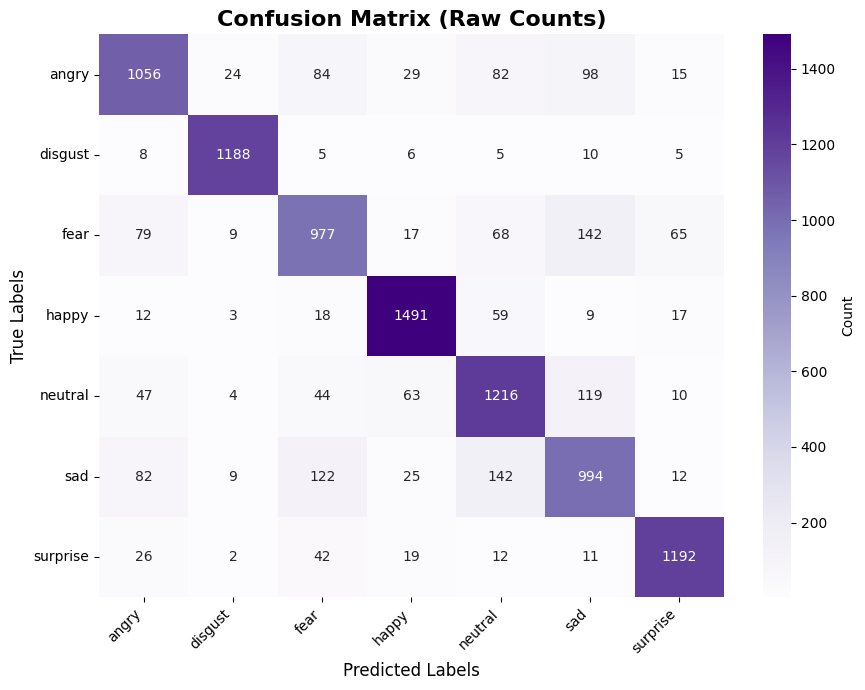

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load trained model
model = load_model('best_emotion_model.keras')

# Emotion labels (make sure it matches your dataset)
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

# Print metrics
print("📊 Confusion Matrix:\n", cm)
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred_classes, target_names=emotion_labels))
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"\n✅ Model Accuracy: {accuracy * 100:.2f}%")

# --- Plot Confusion Matrix ---
plt.figure(figsize=(9, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", 
            xticklabels=emotion_labels, yticklabels=emotion_labels,
            cbar_kws={'label': 'Proportion'})

plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Optional: Non-normalized version for raw counts ---
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=emotion_labels, yticklabels=emotion_labels,
            cbar_kws={'label': 'Count'})

plt.title('Confusion Matrix (Raw Counts)', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


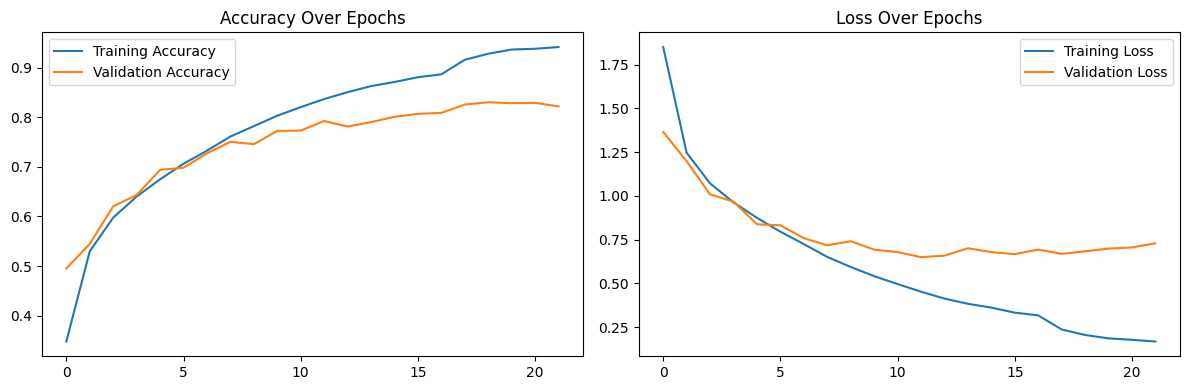

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [18]:
# ----- Per-class accuracy calculation -----
emotion_labels = emotion_labels  # use same order as folder names

for emo_idx in range(len(emotion_labels)):
    x_data = X_val[y_val.argmax(axis=1) == emo_idx]
    y_data = y_val[y_val.argmax(axis=1) == emo_idx]

    scores = model.evaluate(x_data, y_data, batch_size=32, verbose=0)
    print(f"> Accuracy {scores[1]*100:.2f}% for <{emotion_labels[emo_idx]}>")


> Accuracy 76.08% for <angry>
> Accuracy 96.82% for <disgust>
> Accuracy 72.00% for <fear>
> Accuracy 92.67% for <happy>
> Accuracy 80.90% for <neutral>
> Accuracy 71.72% for <sad>
> Accuracy 91.41% for <surprise>
